In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
#load data
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); 
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_25.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_34.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_184.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_108.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_164.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_143.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_118.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_116.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_165.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_104.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_91.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernar

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
bs = 64


In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

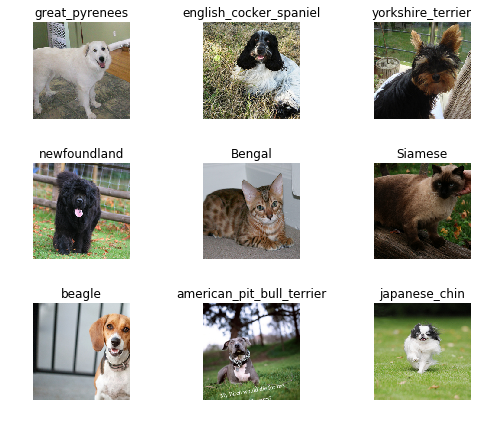

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)
print(len(data.classes),data.c)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37 37


In [13]:
#training with Resnet34
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 36061879.38it/s]


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.405960,0.326872,0.085927,01:24
1,0.562399,0.265445,0.087280,01:24
2,0.348514,0.227030,0.076455,01:24
3,0.261162,0.226507,0.074425,01:23


In [0]:
learn.save('stage-1')

In [0]:
#Evaluation

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

In [19]:
len(data.valid_ds)==len(losses)==len(idxs)

True

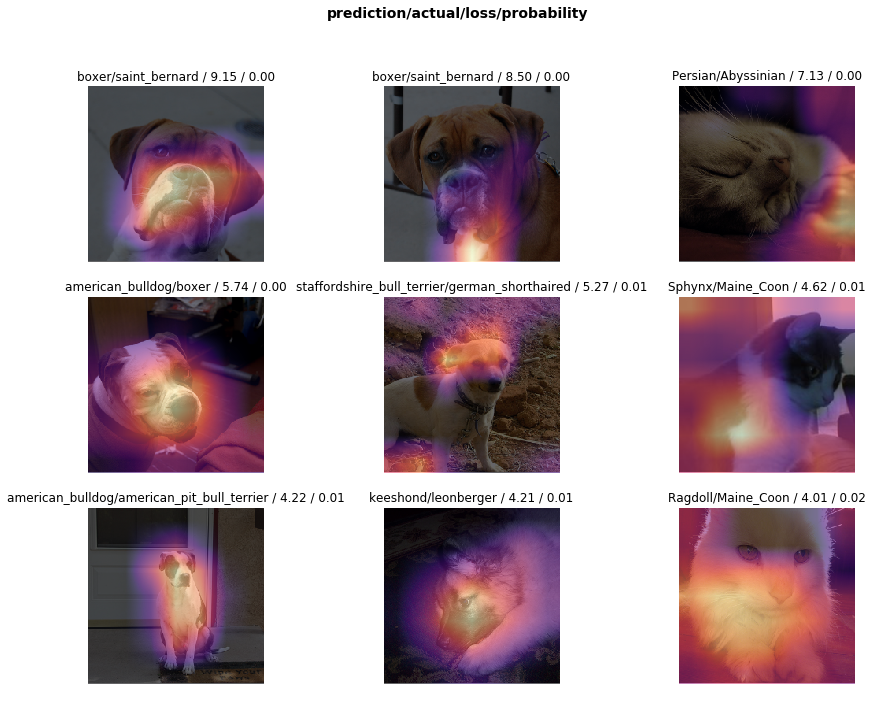

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

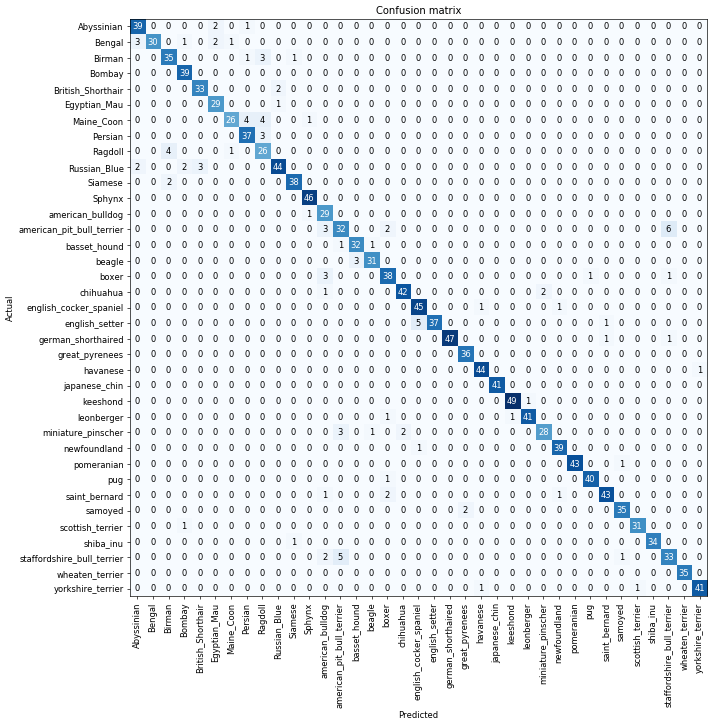

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('english_setter', 'english_cocker_spaniel', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Maine_Coon', 'Persian', 4),
 ('Maine_Coon', 'Ragdoll', 4),
 ('Ragdoll', 'Birman', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Birman', 'Ragdoll', 3),
 ('Persian', 'Ragdoll', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Egyptian_Mau', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Siamese', 'Birman', 2),
 ('american_pit_bull_terrier', 'boxer', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('saint_bernard', 'boxer', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_ter

In [26]:
# Unfreezing, fine-tuning, and learning rates
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.519206,0.365845,0.109608,01:26


In [0]:
learn.load('stage-1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


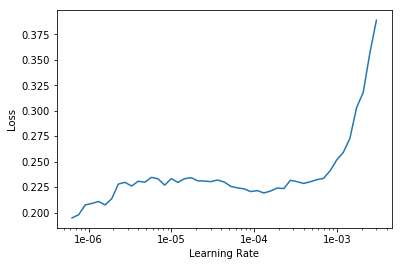

In [28]:
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.197430,0.199901,0.066306,01:26
1,0.171728,0.204135,0.066982,01:25


In [0]:
#training with Resnet50
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [32]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:05<00:00, 18992764.83it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


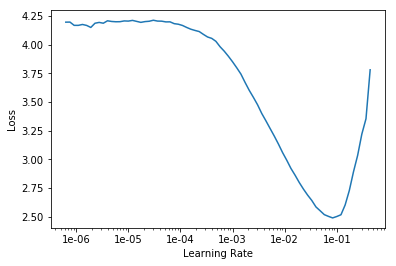

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.729014,0.280119,0.084574,02:11
1,0.375499,0.261195,0.083897,02:10
2,0.349989,0.251834,0.084574,02:10
3,0.259796,0.195661,0.062246,02:10
4,0.193999,0.189343,0.058187,02:09
5,0.140467,0.171214,0.054804,02:09
6,0.108274,0.168246,0.052097,02:09
7,0.083997,0.164838,0.052774,02:09


In [0]:
learn.save('stage-1-50')

In [36]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.097688,0.167244,0.048038,02:20
1,0.095172,0.163393,0.053451,02:18
2,0.077543,0.161522,0.048038,02:19


In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [39]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('boxer', 'american_bulldog', 5),
 ('Persian', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('basset_hound', 'beagle', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Birman', 'Ragdoll', 2),
 ('Siamese', 'Birman', 2),
 ('english_cocker_spaniel', 'german_shorthaired', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]